In [50]:
# Plots the Markov and Chebyshev bounds as a function of a

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_markov(μ, σ):

    a_min = μ
    a_max = min(μ*20,σ*10)

    a = np.linspace(a_min, a_max, 10001)
    plt.plot(a, μ/a, 'b', linewidth=3.0, label='$\mu/a$')

    b_min = μ+σ
    b = np.linspace(b_min, a_max, 10001)
    plt.plot(b, (σ/(b-μ))**2, 'r', linewidth=3.0, label='$(a-\mu)/\sigma^2$')
    plt.plot([μ,μ],[0,1.1])
    plt.plot([μ+σ,μ+σ],[0,1.1],'r')
    plt.legend(fontsize = 30)

    plt.title('Markov and Chebyshev bounds on $P(X\geq a)$ for $\mu=$%0.1f and $\sigma=$%0.1f' %(μ,σ), fontsize = 20)
    plt.grid()
  
    xticks_array = np.concatenate((np.linspace(μ, np.ceil(a_max/μ)*μ, np.ceil(a_max/μ)), np.array([0, μ+σ])))
    #xticks_array=[0,μ+σ]+xticks_array
    plt.xticks(xticks_array, fontsize = 16)
    plt.yticks(np.linspace(0.2, 1, 5), fontsize = 16)
    plt.xlabel('a', fontsize = 20)
    plt.ylabel('Probability bounds', fontsize = 20)
    plt.gcf().set_size_inches(16,8)
    plt.gca().set_xlim([0, a_max])
    plt.gca().set_ylim([0,1.1])
    plt.show()

widgets.interact(plot_markov, μ=widgets.FloatSlider(description = '$\mu$', min=0.5, max=20, step=0.1, value=8, continuous_update = False), 
σ=widgets.FloatSlider(description = '$\sigma$', min=0.5, max=20, step=0.1, value=5, continuous_update = False))


<function __main__.plot_markov>

In [30]:
x = np.array([11,22])
y = np.array([18,7,6])
z = np.array([1,3,5])
np.concatenate((x,y,z))

array([11, 22, 18,  7,  6,  1,  3,  5])

In [35]:
np.array([1, 2])

array([1, 2])

In [37]:
a = np.array([1, 2])
b = np.array([3, 4])
np.concatenate((a, b))

array([1, 2, 3, 4])

In [43]:
a = np.concatenate((np.linspace(1, np.ceil(10/1)*1, 10), np.array([0, 4])))

In [45]:
plt.xticks([1, 2, 3, 4])

([<matplotlib.axis.XTick at 0xa651320>,
 <a list of 4 Text xticklabel objects>)

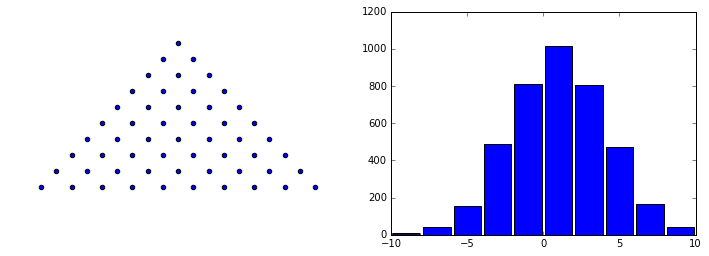

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np


NUM_ROWS = 10
NUM_TRIALS = 4000
PROB_RIGHT = 0.5


# Compute trials
went_right = np.random.sample([NUM_TRIALS, NUM_ROWS]) < PROB_RIGHT
trials = np.where(went_right, 1, -1)
destinations = trials.sum(axis=1)
paths = trials.cumsum(axis=1)

# Prepare figure
fig, (ax_board, ax_dest) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax_board.set_xlim(-NUM_ROWS, NUM_ROWS)
ax_board.axis('off')

# Plot pegs
pegs_x = np.concatenate([np.linspace(-row, row, num=(row + 1))
                        for row in range(NUM_ROWS)])
pegs_y = np.repeat(range(NUM_ROWS, 0, -1), range(1, NUM_ROWS + 1))
ax_board.scatter(pegs_x, pegs_y)

# Plot paths
paths_x = np.concatenate((np.zeros((NUM_TRIALS, 1)), paths), axis=1)
path_y = np.linspace(NUM_ROWS, 0, num=(NUM_ROWS + 1)) + 0.4
ax_board.plot(paths_x.T, path_y,
         color=(0, 0.9, 0.3, 3 / NUM_TRIALS),
         linewidth=3);

# Plot destinations histogram
bins = np.arange(-NUM_ROWS, NUM_ROWS + 2, 2)
ax_dest.hist(destinations, bins=bins, rwidth=0.9);